# Whatsapp Chat Visualization PDD.DA'19

In [564]:
#import necessory file 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
from bokeh.io import output_file, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import altair as alt
from vega_datasets import data
alt.renderers.enable('default')
import calendar

In [565]:
#import data
data = pd.read_csv(r"WhatsApp Chat with PDD.DA’19.txt", error_bad_lines=False)


b'Skipping line 58: expected 2 fields, saw 3\nSkipping line 78: expected 2 fields, saw 3\nSkipping line 94: expected 2 fields, saw 3\nSkipping line 114: expected 2 fields, saw 3\nSkipping line 115: expected 2 fields, saw 3\nSkipping line 133: expected 2 fields, saw 3\nSkipping line 187: expected 2 fields, saw 3\nSkipping line 189: expected 2 fields, saw 3\nSkipping line 197: expected 2 fields, saw 3\nSkipping line 265: expected 2 fields, saw 3\nSkipping line 272: expected 2 fields, saw 3\nSkipping line 292: expected 2 fields, saw 3\nSkipping line 293: expected 2 fields, saw 3\nSkipping line 295: expected 2 fields, saw 3\nSkipping line 296: expected 2 fields, saw 3\nSkipping line 332: expected 2 fields, saw 4\nSkipping line 343: expected 2 fields, saw 3\nSkipping line 349: expected 2 fields, saw 3\nSkipping line 352: expected 2 fields, saw 3\nSkipping line 357: expected 2 fields, saw 3\nSkipping line 360: expected 2 fields, saw 3\nSkipping line 377: expected 2 fields, saw 3\nSkipping li

In [566]:
# First View of Data
data

,05/09/2019,4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.
0,03/09/2019,"5:34 pm - rashman canada created group ""Langa..."
1,05/09/2019,4:29 pm - rashman canada added you
2,05/09/2019,4:30 pm - rashman canada added +91 82190 16358
3,05/09/2019,4:30 pm - You're now an admin
4,05/09/2019,9:07 pm - dharun cls: Does anyone have any id...
...,...,...
14612,24/07/2020,12:57 pm - tuli class: Thanks
14613,24/07/2020,9:29 pm - kirra: did azadeh tell us to show c...
14614,24/07/2020,9:56 pm - Harshad Langara: I think its accord...
14615,25/07/2020,8:42 pm - Vedant Langara: <Media omitted>


In [567]:
# checking columns in the data 
data.columns

Index(['05/09/2019', ' 4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.'], dtype='object')

In [568]:
# Renaming columns 
data.rename(columns = {"05/09/2019":"Date"," 4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.":"info"}, inplace = True)

In [569]:
# Spliting info into Time and Message
new = data["info"].str.split("-", n = 1, expand = True) 
# making separate first name column from new data frame 
data["Time"]= new[0] 
  
# making separate last name column from new data frame 
data["Message"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["info"], inplace = True) 
  
# df display 
data.head()

,Date,Time,Message
0,03/09/2019,5:34 pm,"rashman canada created group ""Langara College"""
1,05/09/2019,4:29 pm,rashman canada added you
2,05/09/2019,4:30 pm,rashman canada added +91 82190 16358
3,05/09/2019,4:30 pm,You're now an admin
4,05/09/2019,9:07 pm,dharun cls: Does anyone have any idea how to ...


In [570]:
# Seprating Message into Name and Messages 
# new data frame with split value columns 
new = data["Message"].str.split(":", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Name"]= new[0] 
  
# making separate last name column from new data frame 
data["Messages"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Message"], inplace = True) 
  
# df display 
data.head()

,Date,Time,Name,Messages
0,03/09/2019,5:34 pm,"rashman canada created group ""Langara College""",None
1,05/09/2019,4:29 pm,rashman canada added you,None
2,05/09/2019,4:30 pm,rashman canada added +91 82190 16358,None
3,05/09/2019,4:30 pm,You're now an admin,None
4,05/09/2019,9:07 pm,dharun cls,Does anyone have any idea how to solve questi...


In [571]:
#Removing null values 
data.dropna(inplace=True)

In [572]:
#check unique students
data.Name.nunique()

31

In [573]:
#list of the Names from series value_counts object
UniqueList =data["Name"].value_counts().keys().to_list()
print(UniqueList)

[' kirra', ' Roberta Langara', ' dharun cls', ' jaspreet cls canada', ' vasu', ' kiran kumar cls', ' Amir Langara', ' arsh langara', ' jasman cls', ' tuli class', ' naval clss', ' cici', ' Vedant Langara', ' rashman canada', ' nikita langara', ' harshad cls', ' Kania Langara', ' aditi jaswal', ' Kiran Gill', ' david langara', ' vivek reddy', ' Beth Langara', ' Prerna Langara', ' Edward', ' navjot canada', ' minoj bishnoi langara', ' Nicky Langara', ' Harshad Langara', ' +91 79884 37459', ' +91 82190 16358', ' +91 90414 65914']


In [574]:
data['Name'].replace(to_replace = [' dharun cls',
 ' vasu',
 ' vivek reddy',
 ' +91 90414 65914',
 ' rashman canada',
 ' jaspreet cls canada',
 ' tuli class',
 ' Prerna Langara',
 ' +91 82190 16358',
 ' nikita langara',
 ' navjot canada',
 ' Kiran Gill',
 ' arsh langara',
 ' Edward',
 ' jasman cls',
 ' kirra',
 ' Roberta Langara',
 ' Harshad Langara',
 ' minoj bishnoi langara',
 ' Vedant Langara',
 ' kiran kumar cls',
 ' Beth Langara',
 ' aditi jaswal',
 ' naval clss',
 ' david langara',
 ' harshad cls',
 ' Amir Langara',
 ' Kania Langara',
 ' Nicky Langara',
 ' cici',
 ' +91 79884 37459'], value = ['Dharun',
                               'Vasu',
                               'Vivek',
                               '+91 90414 65914',
                               'Rashman',
                                ' Jaspreet',
 ' Tuli ',
 ' Prerna',
 ' +91 82190 16358',
 ' Nikita ',
 ' Navjot ',
 ' Kiran ',
 ' Arsh ',
 ' Edward',
 ' Jasman',
 ' Kirra',
 ' Roberta',
 ' Harshad',
 ' Manoj',
 ' Vedant ',
 ' Kiran',
 ' Beth',
 ' Aditi',
 ' Naval',
 ' David',
 ' Harshad',
 ' Amir',
 ' Kania',
 ' Nicky',
 ' Cici',
 ' Manoj'],inplace=True)

In [575]:
#total unique Names in Data frame 
len(data.Name.unique())

29

In [576]:
# Exporting Data 
data.to_csv("Chat.csv", index =False)

In [577]:
# Display Head 
data.head()

,Date,Time,Name,Messages
4,05/09/2019,9:07 pm,Dharun,Does anyone have any idea how to solve questi...
6,05/09/2019,9:08 pm,Dharun,Spoiler alert: answer is
8,05/09/2019,9:09 pm,Dharun,But if anyone knows how to solve it.. it woul...
9,05/09/2019,9:10 pm,Dharun,I know it's x ≤ -3
10,05/09/2019,9:10 pm,Vasu,Let me see


In [578]:
# Converting Date into datetime 
data['Date'] =  pd.to_datetime(data['Date'],format="%d/%m/%Y")

In [579]:
# Creating a Function to convert 12 Hours format to 24 Hours format.
def t(x):
    if x[-3:-1]=='pm' and x.split(':')[0][1:3]=='12':
        return(x[1:6])
    if x[-3:-1]=='pm' and x.split(':')[0][:2]!='12':
        return(str(int(x.split(':')[0])+12)+str(':')+str(x.split(':')[1][:2]))
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='12':
        return(str('00')+str(':')+str(x.split(':')[1][:2]))
    if x[-3:-1]=='am' and x.split(':')[0][:2]!='12' and x.split(':')[0][1:3]!='10' and x.split(':')[0][1:3]!='11':
        return(x[1:5])
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='10':
        return(x[1:6])
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='11':
        return(x[1:6])

In [580]:
# Applying function on Time using lambda 
data['Time'] = data['Time'].apply(lambda x: t(x))

In [581]:
# Display head of the data 
data.head()

,Date,Time,Name,Messages
4,2019-09-05,21:07,Dharun,Does anyone have any idea how to solve questi...
6,2019-09-05,21:08,Dharun,Spoiler alert: answer is
8,2019-09-05,21:09,Dharun,But if anyone knows how to solve it.. it woul...
9,2019-09-05,21:10,Dharun,I know it's x ≤ -3
10,2019-09-05,21:10,Vasu,Let me see


In [582]:
# Convert Time columnn to date time format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

In [583]:
# checking data type 
data.dtypes

Date        datetime64[ns]
Time        datetime64[ns]
Name                object
Messages            object
dtype: object

In [584]:
data1 = data 

In [585]:
data1.head()

,Date,Time,Name,Messages
4,2019-09-05,1900-01-01 21:07:00,Dharun,Does anyone have any idea how to solve questi...
6,2019-09-05,1900-01-01 21:08:00,Dharun,Spoiler alert: answer is
8,2019-09-05,1900-01-01 21:09:00,Dharun,But if anyone knows how to solve it.. it woul...
9,2019-09-05,1900-01-01 21:10:00,Dharun,I know it's x ≤ -3
10,2019-09-05,1900-01-01 21:10:00,Vasu,Let me see


In [586]:
# As we can see Time column contain some extra value that look like some date 
# we will merge Date and Time column

# creating a period column that contain string values of therir respectivve date and tiem column
data1["period"] = data1["Date"].astype(str) +"/"+ data1["Time"].astype(str)
period = data1["period"].to_list()

In [587]:
# Creating a list Datetime with cleaned values
DateTime = []
for i in period:
    DateTime.append(i[0:10]+" "+i[22:])
    
# Creating a Date column with right format
data1['Date'] =  pd.to_datetime(DateTime,format="%Y-%m-%d %H:%M:%S")

# Droping Time & period Columns 
data1.drop("Time", axis = 1, inplace =True)
data1.drop("period", axis = 1, inplace =True)

# Displaying Head 
data1.head()

,Date,Name,Messages
4,2019-09-05 21:07:00,Dharun,Does anyone have any idea how to solve questi...
6,2019-09-05 21:08:00,Dharun,Spoiler alert: answer is
8,2019-09-05 21:09:00,Dharun,But if anyone knows how to solve it.. it woul...
9,2019-09-05 21:10:00,Dharun,I know it's x ≤ -3
10,2019-09-05 21:10:00,Vasu,Let me see


In [588]:
#Creating a Weekday column 
data1['Weekdays'] = data1['Date'].dt.day_name()
data1.head()

,Date,Name,Messages,Weekdays
4,2019-09-05 21:07:00,Dharun,Does anyone have any idea how to solve questi...,Thursday
6,2019-09-05 21:08:00,Dharun,Spoiler alert: answer is,Thursday
8,2019-09-05 21:09:00,Dharun,But if anyone knows how to solve it.. it woul...,Thursday
9,2019-09-05 21:10:00,Dharun,I know it's x ≤ -3,Thursday
10,2019-09-05 21:10:00,Vasu,Let me see,Thursday


In [589]:
data1.to_csv(r"FinalData.csv", index = False)

# Total Messages count per Student

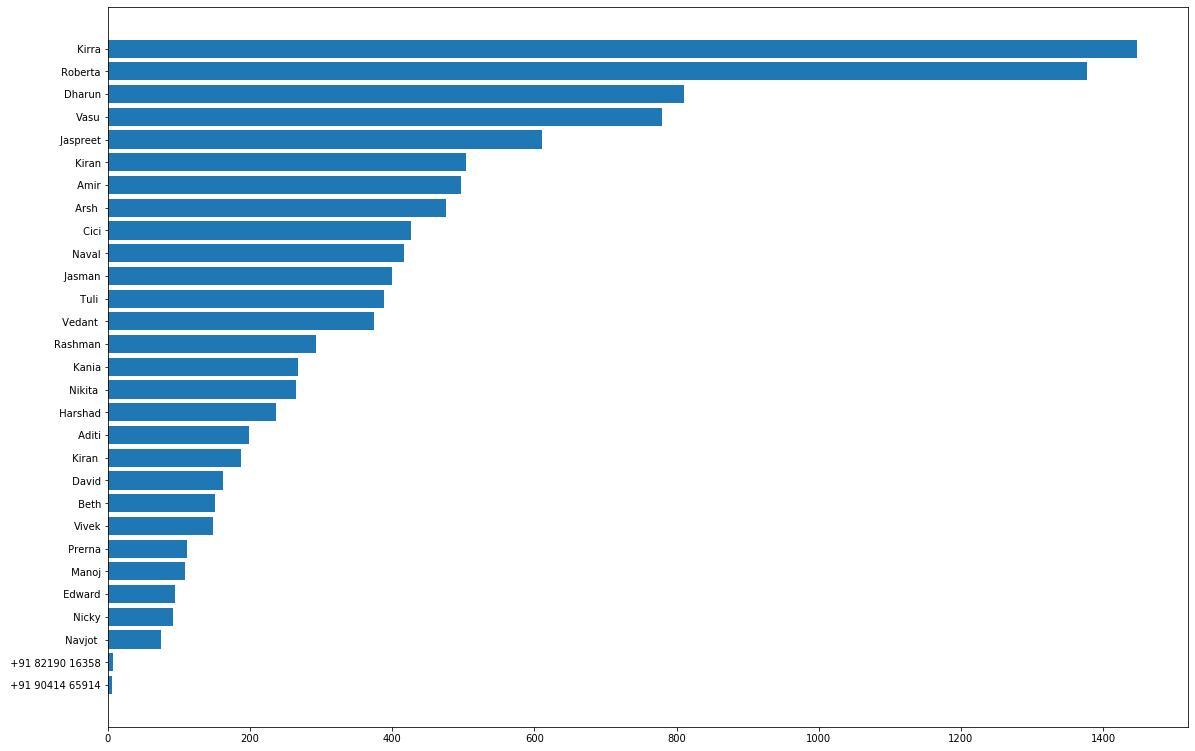

In [590]:
# Total Messages count per Student 

#Groupby by names to get total number of messages 
Total_number_of_messages=pd.DataFrame(data1.groupby("Name")["Messages"].nunique())

#Creating a sorted dataframe 
Total_number_of_messages =pd.DataFrame(Total_number_of_messages["Messages"].sort_values(ascending=True))

# Simple horizontal Plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages.index,Total_number_of_messages.Messages)
plt.show()

# Total Message count on Weekdays

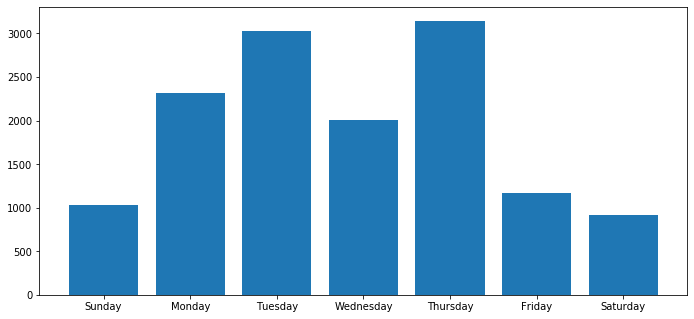

In [591]:
data_Weekdays_Count=pd.DataFrame(data1.groupby('Weekdays').Messages.count())
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

data_Weekdays_Count['Weekday'] = data_Weekdays_Count.index
data_Weekdays_Count['Weekday'] = data_Weekdays_Count['Weekday'].map(sorterIndex)
data_Weekdays_Count.sort_values('Weekday',inplace=True)
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(data_Weekdays_Count.index,data_Weekdays_Count.Messages)
plt.show()

# Message count for Term 1

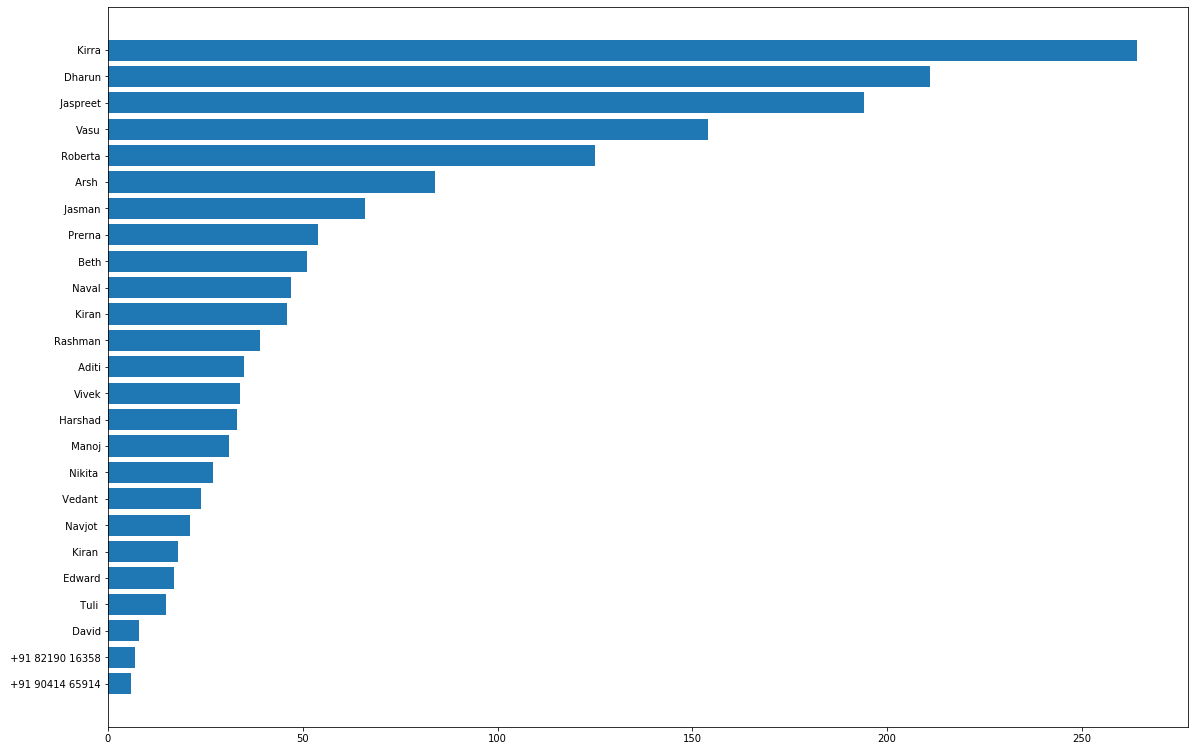

In [592]:
#Groupby by names to get total number of messages in term1
Total_number_of_messages_term1=pd.DataFrame(data1[(data1.Date.dt.month>=9) & (data1.Date.dt.month<=12) &
                                                (data1.Date.dt.year == 2019)].groupby('Name').Messages.count())

#Creating a sorted dataframe in term1
Total_number_of_messages_term1 =pd.DataFrame(Total_number_of_messages_term1["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term1
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term1.index,Total_number_of_messages_term1.Messages)
plt.show()

# Message count for Term 2

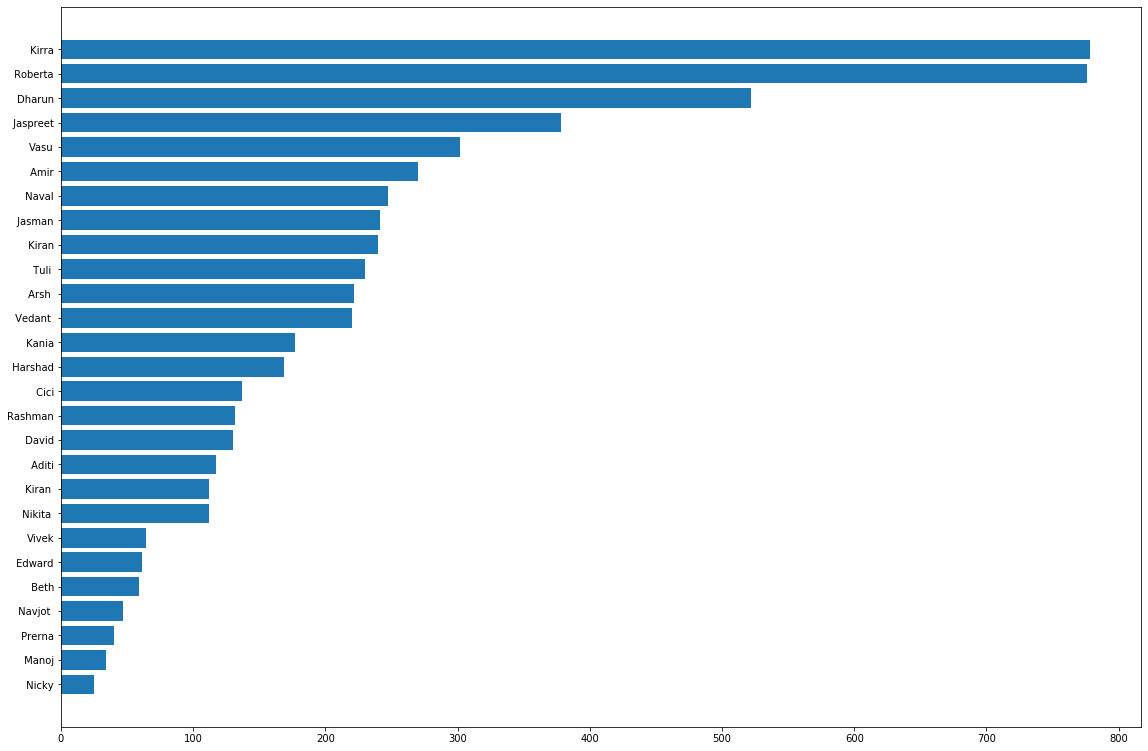

In [593]:
#Groupby by names to get total number of messages in term2
Total_number_of_messages_term2=pd.DataFrame(data1[(data1.Date.dt.month>=1) & (data1.Date.dt.month<=4) &
                                                (data1.Date.dt.year == 2020)].groupby('Name').Messages.count())

#Creating a sorted dataframe in term1
Total_number_of_messages_term2 =pd.DataFrame(Total_number_of_messages_term2["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term2
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term2.index,Total_number_of_messages_term2.Messages)
plt.show()

# Message count for Term 3

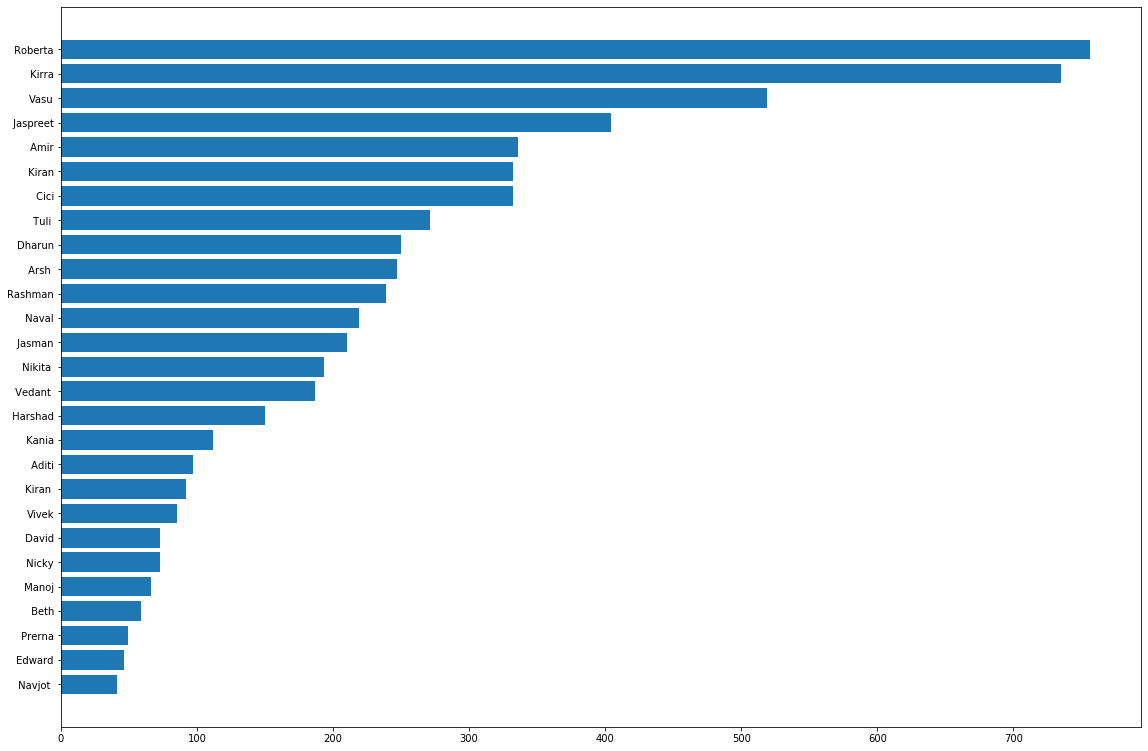

In [594]:
#Groupby by names to get total number of messages in term3
Total_number_of_messages_term3=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020)].groupby('Name').Messages.count())

#Creating a sorted dataframe in term3
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term3.index,Total_number_of_messages_term3.Messages)
plt.show()

# Number of messages during CPSC lecture

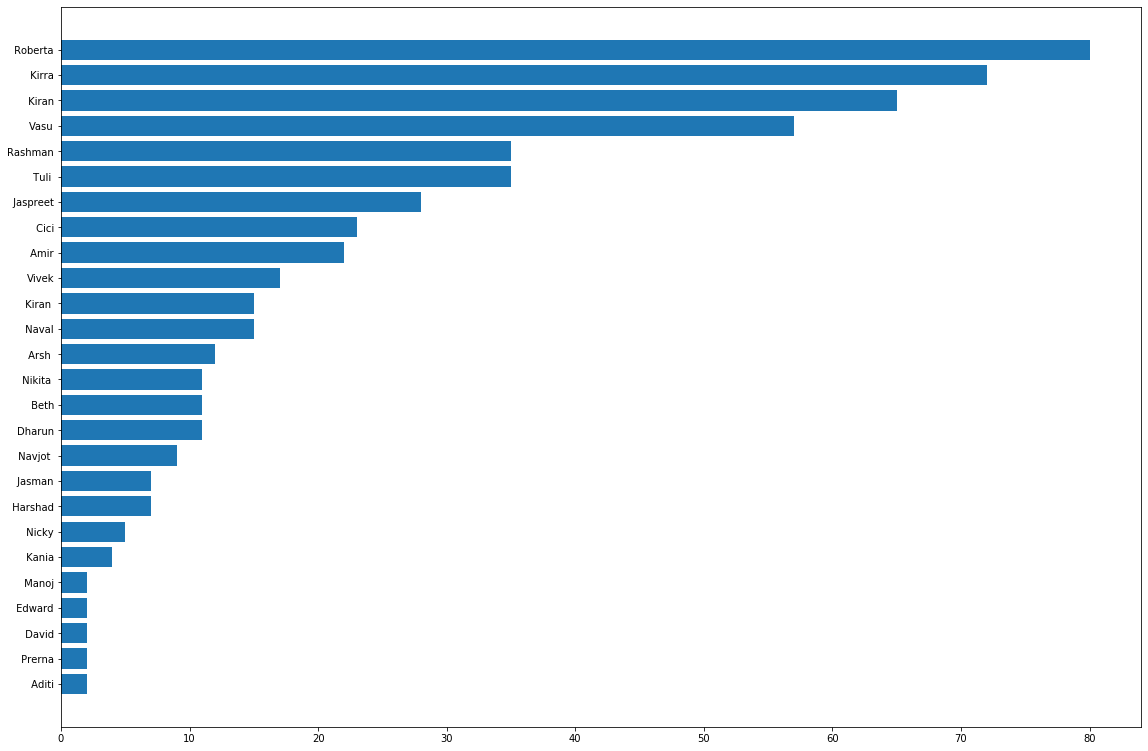

In [595]:
#Groupby by names to get total number of messages in term3

#creating a data frame for Term 3 and for Monday
Total_number_of_messages_term3=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 (data1.Weekdays == "Monday") 
                                               ])

# set date as index because in next step we need to filter data as per time 
Total_number_of_messages_term3.set_index("Date", inplace= True)

# filtering data as per time and 
#creating a new data frame for the messages count in between 4:30 PM and 6:30 pm
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3.between_time("16:30",
    "18:30").groupby("Name").Messages.count())


#Creating a sorted dataframe in term3
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term3.index,Total_number_of_messages_term3.Messages)
plt.show()

# Number of message during CPSC Lab

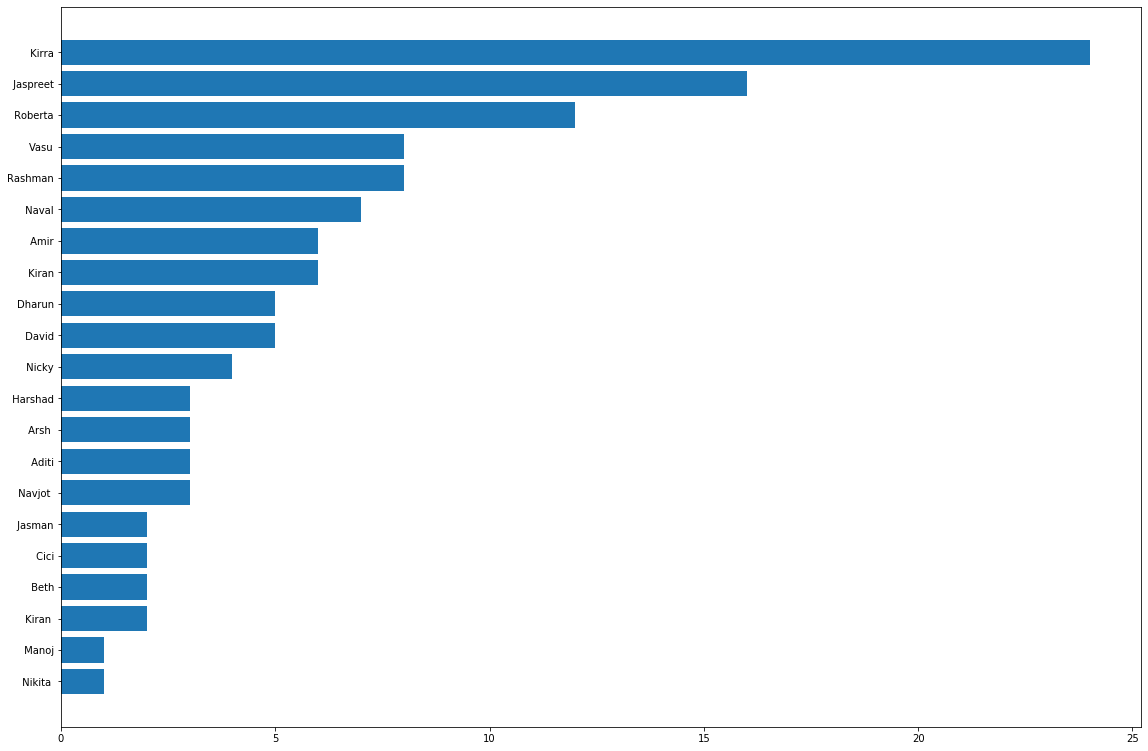

In [596]:
#Groupby by names to get total number of messages in term3

#creating a data frame for Term 3 and for Wednesday
Total_number_of_messages_term3Lab=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 (data1.Weekdays == "Wednesday") 
                                               ])

# set date as index because in next step we need to filter data as per time 
Total_number_of_messages_term3Lab.set_index("Date", inplace= True)

# filtering data as per time and 
#creating a new data frame for the messages count in between 4:30 PM and 6:30 pm
Total_number_of_messages_term3Lab =pd.DataFrame(Total_number_of_messages_term3Lab.between_time("16:30",
    "18:30").groupby("Name").Messages.count())


#Creating a sorted dataframe in term3
Total_number_of_messages_term3Lab =pd.DataFrame(Total_number_of_messages_term3Lab["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term3Lab.index,Total_number_of_messages_term3Lab.Messages)
plt.show()

# Number of Messages during DANA 4830

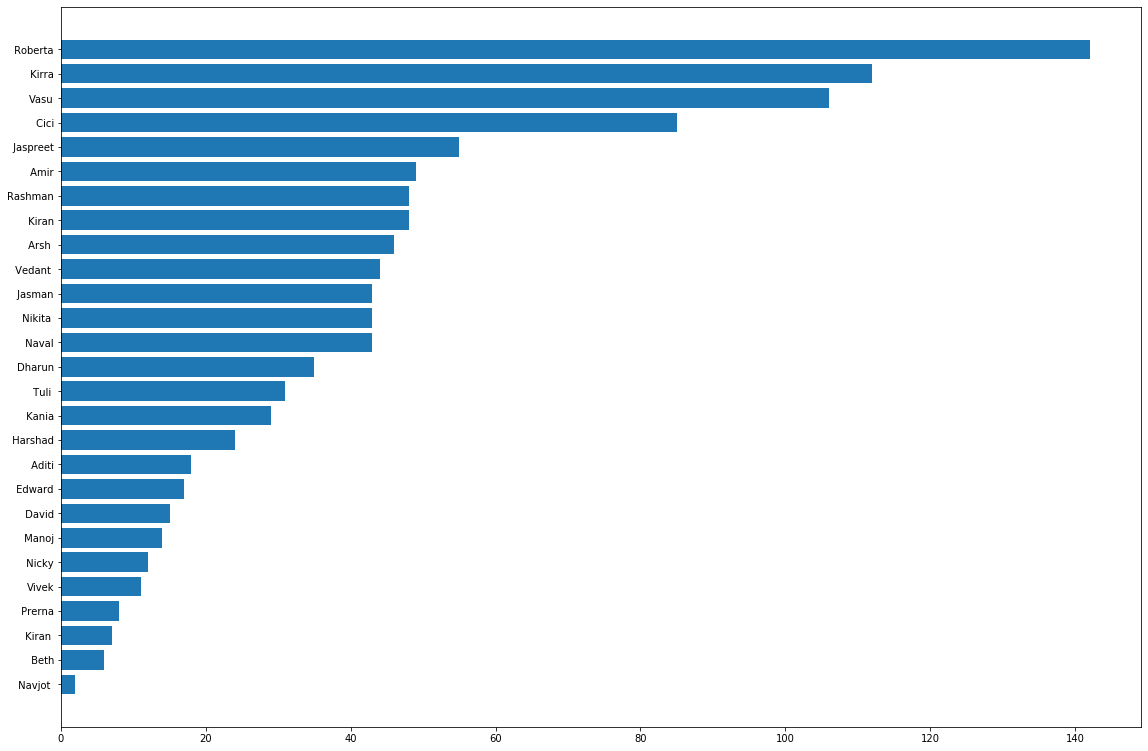

In [597]:
#Groupby by names to get total number of messages in term3
Total_number_of_messages_term3=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 ((data1.Weekdays == "Tuesday")|(data1.Weekdays == "Thursday")) &
                                                (data1.Date.dt.hour>=18) &
                                                (data1.Date.dt.hour<=20)].groupby('Name').Messages.count())

#Creating a sorted dataframe in term3
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.barh(Total_number_of_messages_term3.index,Total_number_of_messages_term3.Messages)
plt.show()

# Number of Messages per Month 

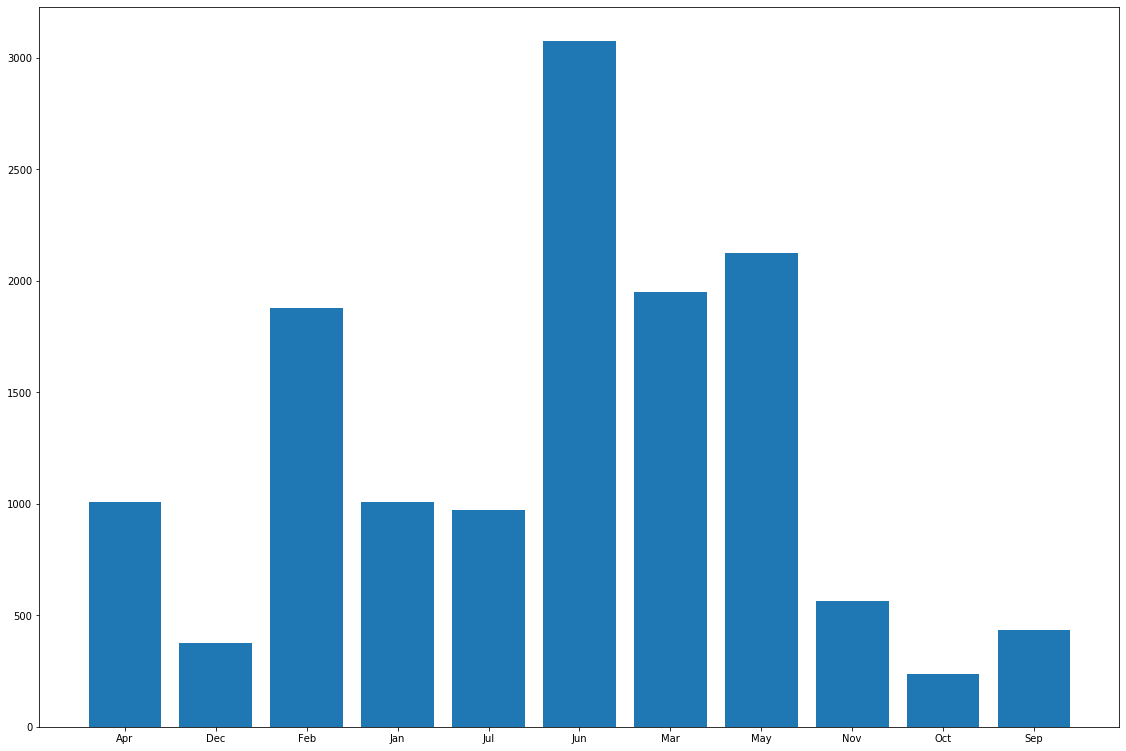

In [598]:
# Extracting months in a List and creating a month column with it  
Month=[]
for i in list(data1.Date.dt.month):
    Month.append(calendar.month_abbr[i])

data1["Month"]= Month

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(data1.groupby("Month").Messages.count().index,data1.groupby("Month").Messages.count().values)
plt.show()

# Total message count per month for each student

In [599]:
# Creating a line chart in Altier that shows total message per month for each student 

# Creating a new data frame which has message count per month for each student 
df=pd.DataFrame(data1['Messages'].groupby([data1.Month,data1.Name]).count())

# Reset the index 
df.reset_index(inplace=True)

# Generate a month list 
month= ['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul']



# Binding Values for our dropdown 
input_dropdown = alt.binding_select(options=list(set(df.Name.unique())))

# selection
selected_points = alt.selection_single(fields=['Name'], bind=input_dropdown, name='Select')

#color 
color = alt.condition(selected_points,
alt.Color('Name:N'),
alt.value('transparent'))

# Define Chart 
alt.Chart(df, width=500, height=500).mark_line().encode(
x=alt.X('Month',sort=month ),
y='Messages',
color=color,
tooltip='Name:Q'
).add_selection(selected_points)


alt.Chart(...)

# Total Message Count Per day for each month

In [600]:
# Most chat on the day

In [601]:
# Creating a new data frame which has message count per day 

df1=pd.DataFrame(data1["Messages"].groupby([data1.Month,data1.Date.dt.day]).count())

# Resting index
df1.reset_index(inplace=True)

# Binding Values for our dropdown 
input_dropdown1 = alt.binding_select(options=list(set(df1.Month.unique())))

#selection 
selected_points1 = alt.selection_single(fields=['Month'], bind=input_dropdown1, name='Select')

# color  
color = alt.condition(selected_points1,alt.Color('Month:N'),alt.value('transparent'))

# define Chart
alt.Chart(df1, width=730, height=500).mark_line().encode(
x='Date:Q',
y='Messages',
color=color,
tooltip='Month:Q'
).add_selection(selected_points1)



alt.Chart(...)

# Which day i spend more time on study group

In [602]:
# Creating a new data frame which has total message count for every week 
df2=pd.DataFrame(data1["Messages"].groupby([data1.Name,data1.Weekdays]).count())
df2.reset_index(inplace=True)

# Binding Values for our dropdown 
input_dropdown = alt.binding_select(options=list(set(df2.Name.unique())))

#Selection 
selected_points = alt.selection_single(fields=['Name'], bind=input_dropdown, name='Select')

#Color 
color = alt.condition(selected_points,
alt.Color('Name:N'),
alt.value('transparent'))

#Define Chart 
alt.Chart(df2, width=730, height=500).mark_line().encode(
x=alt.X('Weekdays',sort=sorter ),
y='Messages',
color=color,
tooltip='Messages'
).add_selection(selected_points)

alt.Chart(...)

In [603]:
output_notebook()

Loading BokehJS ...

# Pie Chart to represent proportion of messages sent 

In [604]:
# Create a dataframe to to count messages for each student 
data3 = pd.DataFrame(data1.groupby("Name").Messages.count())

# sorting values of message count 
Contribute=data3.sort_values("Messages",ascending=False)

# Checking sum of messages after 15th observation
Contribute.iloc[15:].Messages.sum()

2273

In [605]:
# temp df to store first 15 data points 
x=Contribute.iloc[0:15]

# adding a new data point to temp df as Other 
x.loc["Other"]=[2273]

# Reseting Index 
x.reset_index(inplace=True)

data=x
data['angle'] = data['Messages']/data['Messages'].sum() * 2*pi
data['color'] = Category20c[len(x)]
data['percent'] = (data['Messages'] / x.Messages.sum()) * 100

p = figure(plot_height=600, title="Pie Chart", toolbar_location=None,
        tools="hover", tooltips="@Name: @percent{0.2f} %")

p.wedge(x=0, y=0, radius=0.9,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', source=data)

p.axis.visible = False

show(p)

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst